In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import pickle

In [62]:
data = pd.read_csv("F:\GUVI\Project\Car_Dekho\Codes\Cleaned Data\Final_data.csv", index_col=0)

<>:1: SyntaxWarning: invalid escape sequence '\G'
<>:1: SyntaxWarning: invalid escape sequence '\G'
C:\Users\syeda\AppData\Local\Temp\ipykernel_6764\730397689.py:1: SyntaxWarning: invalid escape sequence '\G'
  data = pd.read_csv("F:\GUVI\Project\Car_Dekho\Codes\Cleaned Data\Final_data.csv", index_col=0)


In [63]:
data.head()

,Body type,Kilometers driven,Transmission type,Number of Owners,Car model,Year of manufacture,price,Fuel Type,Insurance Validity,Seats,Engine,Mileage,Color,Turbo Charger,Super Charger,Steering Type,Top Speed,No of doors,Cargo Volumn,City
0,Hatchback,120000,Manual,3,Maruti Celerio,2015,400000.0,Petrol,Third Party insurance,5.0,998.0,23.10,White,No,No,Power,150.0,5,235,bangalore
1,SUV,32706,Manual,2,Ford Ecosport,2018,811000.0,Petrol,Comprehensive,5.0,1497.0,17.00,White,No,No,Power,170.0,4,352,bangalore
2,Hatchback,11949,Manual,1,Tata Tiago,2018,585000.0,Petrol,Comprehensive,5.0,1199.0,23.84,Red,No,No,Power,150.0,5,242,bangalore
3,Sedan,17794,Manual,1,Hyundai Xcent,2014,462000.0,Petrol,Comprehensive,5.0,1197.0,19.10,Others,No,No,Power,172.0,4,407,bangalore
4,SUV,60000,Manual,1,Maruti SX4 S Cross,2015,790000.0,Diesel,Third Party insurance,5.0,1248.0,23.65,Gray,Yes,No,Power,190.0,5,353,bangalore


In [64]:
data['City'].value_counts()

City
delhi        1485
hyderabad    1483
bangalore    1481
chennai      1419
kolkata      1381
jaipur       1120
Name: count, dtype: int64

In [65]:
data.duplicated().sum()

109

In [66]:
data.drop_duplicates(inplace=True)

In [67]:
data.duplicated().sum()

0

In [68]:
data.drop(['Turbo Charger','Car model', 'Color', 'Super Charger','No of doors'], axis=1, inplace=True)

In [69]:
data.select_dtypes(include='object')

,Body type,Transmission type,Fuel Type,Insurance Validity,Steering Type,City
0,Hatchback,Manual,Petrol,Third Party insurance,Power,bangalore
1,SUV,Manual,Petrol,Comprehensive,Power,bangalore
2,Hatchback,Manual,Petrol,Comprehensive,Power,bangalore
3,Sedan,Manual,Petrol,Comprehensive,Power,bangalore
4,SUV,Manual,Diesel,Third Party insurance,Power,bangalore
...,...,...,...,...,...,...
8364,Hatchback,Manual,Petrol,Third Party insurance,Electric,kolkata
8365,Hatchback,Manual,Petrol,Third Party insurance,Power,kolkata
8366,Sedan,Automatic,Petrol,Third Party insurance,Power,kolkata
8367,Hatchback,Manual,Petrol,Third Party insurance,Power,kolkata


In [70]:
label_encoders = {}
categorical_columns = ['Body type', 'Transmission type', 'Fuel Type', 'Insurance Validity', 'Steering Type', 'City']

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [71]:
data.head()

,Body type,Kilometers driven,Transmission type,Number of Owners,Year of manufacture,price,Fuel Type,Insurance Validity,Seats,Engine,Mileage,Steering Type,Top Speed,Cargo Volumn,City
0,2,120000,1,3,2015,400000.0,4,5,5.0,998.0,23.10,4,150.0,235,0
1,7,32706,1,2,2018,811000.0,4,0,5.0,1497.0,17.00,4,170.0,352,0
2,2,11949,1,1,2018,585000.0,4,0,5.0,1199.0,23.84,4,150.0,242,0
3,8,17794,1,1,2014,462000.0,4,0,5.0,1197.0,19.10,4,172.0,407,0
4,7,60000,1,1,2015,790000.0,1,5,5.0,1248.0,23.65,4,190.0,353,0


In [72]:
feature_cols = ["Kilometers driven","Number of Owners","Year of manufacture","Seats","Engine","Mileage","Cargo Volumn"]

In [73]:
mm_features = MinMaxScaler()
data[feature_cols] = mm_features.fit_transform(data[feature_cols])
mm_price = MinMaxScaler()
data[["price"]] = mm_price.fit_transform(data[["price"]])

In [74]:
data.head()

,Body type,Kilometers driven,Transmission type,Number of Owners,Year of manufacture,price,Fuel Type,Insurance Validity,Seats,Engine,Mileage,Steering Type,Top Speed,Cargo Volumn,City
0,2,0.021818,1,0.6,0.789474,0.009157,4,5,0.375,0.1996,0.120524,4,150.0,0.000053,0
1,7,0.005947,1,0.4,0.868421,0.019066,4,0,0.375,0.2994,0.074631,4,170.0,0.000084,0
2,2,0.002173,1,0.2,0.868421,0.013617,4,0,0.375,0.2398,0.126091,4,150.0,0.000055,0
3,8,0.003235,1,0.2,0.763158,0.010652,4,0,0.375,0.2394,0.090430,4,172.0,0.000098,0
4,7,0.010909,1,0.2,0.789474,0.018559,1,5,0.375,0.2496,0.124661,4,190.0,0.000084,0


In [75]:
data["City"].value_counts()

City
2    1471
3    1464
0    1463
1    1409
5    1361
4    1092
Name: count, dtype: int64

In [76]:
data_corr = data.corr()

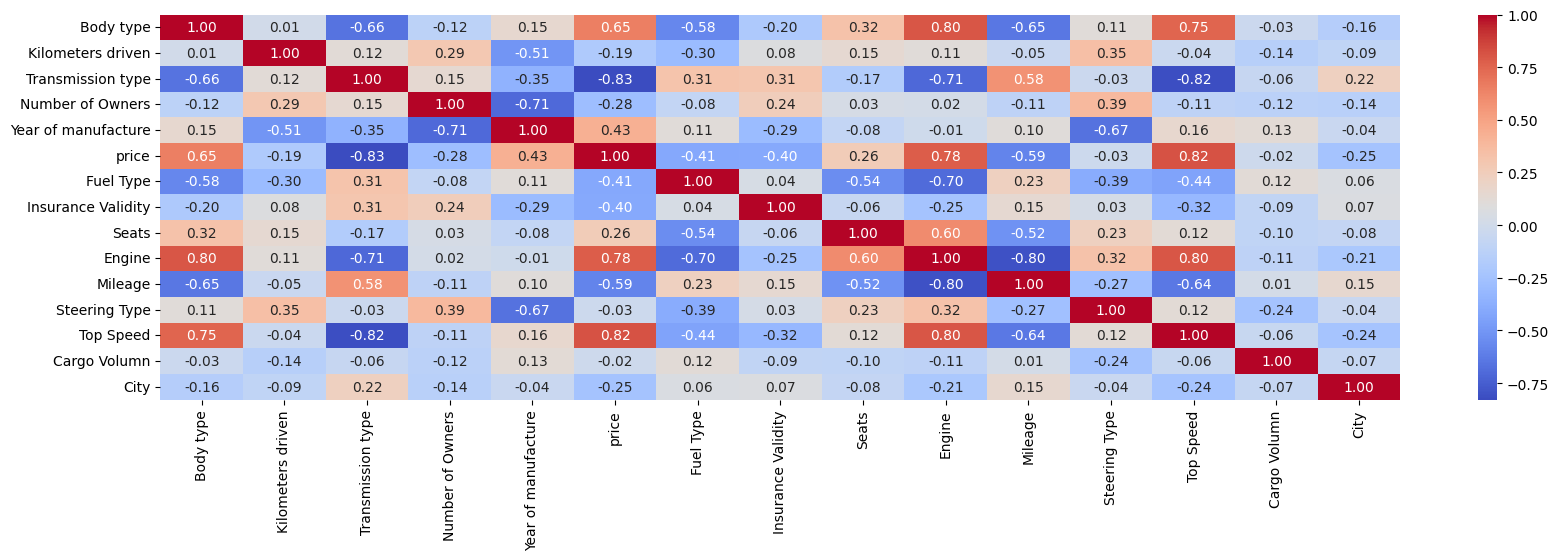

In [77]:
plt.figure(figsize=(20,5))
sns.heatmap(data=data_corr.corr(),annot=True,fmt=".2f",cmap="coolwarm")
plt.show()

In [78]:
data.columns

Index(['Body type', 'Kilometers driven', 'Transmission type',
       'Number of Owners', 'Year of manufacture', 'price', 'Fuel Type',
       'Insurance Validity', 'Seats', 'Engine', 'Mileage', 'Steering Type',
       'Top Speed', 'Cargo Volumn', 'City'],
      dtype='object')

In [79]:
def get_perform(actual, predict):
    MAE = mean_absolute_error(actual, predict)
    MSE = mean_squared_error(actual, predict)
    MAPE = mean_absolute_percentage_error(actual, predict)
    r2 = r2_score(actual, predict)
    return pd.DataFrame({
        "mean_absolute_error":[MAE],
        "mean_squared_error":[MSE],
        "mean_absolute_percentage_error": [MAPE],
        "r2_score":[r2]
    })

In [80]:
val = data.drop("price", axis=1)
tar = data["price"]

In [81]:
train_data, test_data, train_lab, test_lab = train_test_split(val, tar, test_size=0.20, random_state=56)

In [82]:
# RandomForestRegressor Model

rfr = RandomForestRegressor(n_estimators= 450,max_depth=100,random_state= 35)
rfr.fit(train_data, train_lab)
rfr_train_pred = rfr.predict(train_data)
rfr_test_pred = rfr.predict(test_data)

In [83]:
get_perform(train_lab, rfr_train_pred)

,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score
0,0.00137,0.000033,1.304036e+09,0.970811


In [84]:
get_perform(test_lab, rfr_test_pred)

,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score
0,0.003678,0.000124,0.166622,0.910688


In [85]:
sample_row  = data.loc[[2]].drop('price', axis=1)

In [86]:
sample_row

,Body type,Kilometers driven,Transmission type,Number of Owners,Year of manufacture,Fuel Type,Insurance Validity,Seats,Engine,Mileage,Steering Type,Top Speed,Cargo Volumn,City
2,2,0.002173,1,0.2,0.868421,4,0,0.375,0.2398,0.126091,4,150.0,0.000055,0


In [87]:

predicted_scaled = rfr.predict(sample_row)

In [88]:
predicted_scaled

array([0.01348299])

In [89]:
predicted_price = mm_price.inverse_transform(predicted_scaled.reshape(-1, 1))

In [90]:
predicted_price[0][0]

579433.3333333326

In [223]:
with open("random_forest_model.pkl",'wb') as file:
    pickle.dump(rfr, file)

In [224]:
with open("minmax_scaler_features.pkl",'wb') as file:
    pickle.dump(mm_features, file)

In [225]:
with open("minmax_scaler_price.pkl",'wb') as file:
    pickle.dump(mm_price, file)

In [55]:
with open('label_encoders.pkl', 'wb') as le_file:
    pickle.dump(label_encoders, le_file)